In [106]:
import pandas as pd
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
pd.set_option("display.max_colwidth",None)
pd.set_option("display.max_rows",21)
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"]=[12,6]
sns.set_style("whitegrid")
pd.set_option("display.max_columns",22)

# Project
## Foodpanda EDA Analysis 

In [107]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\Foodpanda Analysis Dataset.csv")

# Data Info 

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      6000 non-null   object 
 1   gender           6000 non-null   object 
 2   age              6000 non-null   object 
 3   city             6000 non-null   object 
 4   signup_date      6000 non-null   object 
 5   order_id         6000 non-null   object 
 6   order_date       6000 non-null   object 
 7   restaurant_name  6000 non-null   object 
 8   dish_name        6000 non-null   object 
 9   category         6000 non-null   object 
 10  quantity         6000 non-null   int64  
 11  price            6000 non-null   float64
 12  payment_method   6000 non-null   object 
 13  order_frequency  6000 non-null   int64  
 14  last_order_date  6000 non-null   object 
 15  loyalty_points   6000 non-null   int64  
 16  churned          6000 non-null   object 
 17  rating        

In [109]:
df.shape

(6000, 20)

<Axes: >

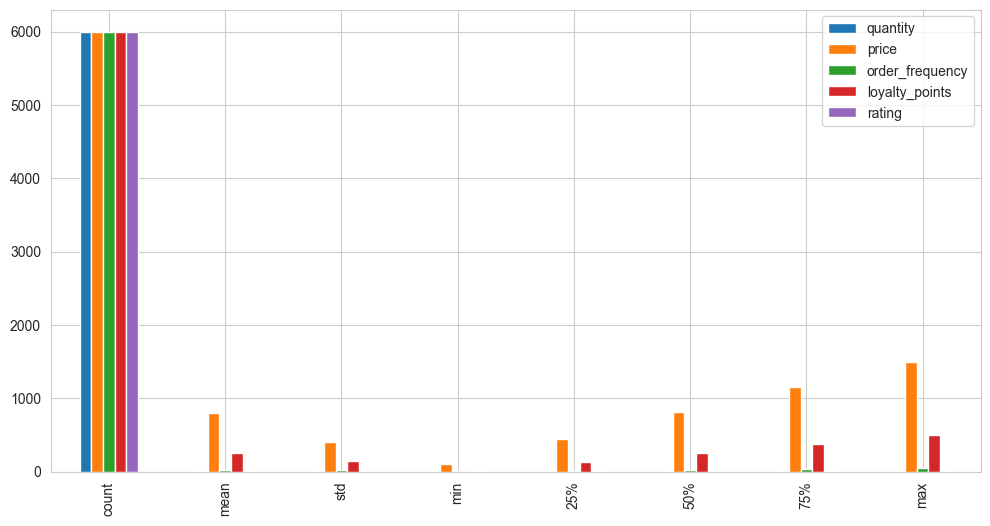

In [110]:
df.describe().plot(kind="bar")

In [111]:
df.head()

,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,quantity,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status
0,C5663,Male,Adult,Peshawar,1/14/2024,O9663,8/23/2023,McDonald's,Burger,Italian,5,1478.27,Cash,38,7/19/2025,238,Active,3,10/14/2024,Cancelled
1,C2831,Male,Adult,Multan,7/7/2024,O6831,8/23/2023,KFC,Burger,Italian,3,956.04,Wallet,24,11/25/2024,81,Active,2,8/21/2025,Delayed
2,C2851,Other,Senior,Multan,6/20/2025,O6851,8/23/2023,Pizza Hut,Fries,Italian,2,882.51,Cash,42,5/10/2025,82,Inactive,3,9/19/2024,Delayed
3,C1694,Female,Senior,Peshawar,9/5/2023,O5694,8/23/2023,Subway,Pizza,Dessert,4,231.30,Card,27,7/24/2025,45,Inactive,2,6/29/2025,Delayed
4,C4339,Other,Senior,Lahore,12/29/2023,O8339,8/24/2023,KFC,Sandwich,Dessert,1,1156.69,Cash,35,12/21/2024,418,Inactive,3,3/6/2025,Cancelled


# Data Cleaning & Handling

In [112]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

In [113]:
df["signup_date"]=pd.to_datetime(df["signup_date"])
df["order_date"]=pd.to_datetime(df["order_date"])
df["last_order_date"]=pd.to_datetime(df["last_order_date"])
df["rating_date"]=pd.to_datetime(df["rating_date"])

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_id      6000 non-null   object        
 1   gender           6000 non-null   object        
 2   age              6000 non-null   object        
 3   city             6000 non-null   object        
 4   signup_date      6000 non-null   datetime64[ns]
 5   order_id         6000 non-null   object        
 6   order_date       6000 non-null   datetime64[ns]
 7   restaurant_name  6000 non-null   object        
 8   dish_name        6000 non-null   object        
 9   category         6000 non-null   object        
 10  quantity         6000 non-null   int64         
 11  price            6000 non-null   float64       
 12  payment_method   6000 non-null   object        
 13  order_frequency  6000 non-null   int64         
 14  last_order_date  6000 non-null   datetim

# Machine Learning

In [115]:
df["revenue"]=df["quantity"] * df["price"]

In [116]:
df.head()

,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,quantity,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status,revenue
0,C5663,Male,Adult,Peshawar,2024-01-14,O9663,2023-08-23,McDonald's,Burger,Italian,5,1478.27,Cash,38,2025-07-19,238,Active,3,2024-10-14,Cancelled,7391.35
1,C2831,Male,Adult,Multan,2024-07-07,O6831,2023-08-23,KFC,Burger,Italian,3,956.04,Wallet,24,2024-11-25,81,Active,2,2025-08-21,Delayed,2868.12
2,C2851,Other,Senior,Multan,2025-06-20,O6851,2023-08-23,Pizza Hut,Fries,Italian,2,882.51,Cash,42,2025-05-10,82,Inactive,3,2024-09-19,Delayed,1765.02
3,C1694,Female,Senior,Peshawar,2023-09-05,O5694,2023-08-23,Subway,Pizza,Dessert,4,231.30,Card,27,2025-07-24,45,Inactive,2,2025-06-29,Delayed,925.20
4,C4339,Other,Senior,Lahore,2023-12-29,O8339,2023-08-24,KFC,Sandwich,Dessert,1,1156.69,Cash,35,2024-12-21,418,Inactive,3,2025-03-06,Cancelled,1156.69


In [117]:
df.drop(columns=["gender","customer_id","rating_date","delivery_status"],inplace=True)

In [118]:
df

,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,quantity,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,revenue
0,Adult,Peshawar,2024-01-14,O9663,2023-08-23,McDonald's,Burger,Italian,5,1478.27,Cash,38,2025-07-19,238,Active,3,7391.35
1,Adult,Multan,2024-07-07,O6831,2023-08-23,KFC,Burger,Italian,3,956.04,Wallet,24,2024-11-25,81,Active,2,2868.12
2,Senior,Multan,2025-06-20,O6851,2023-08-23,Pizza Hut,Fries,Italian,2,882.51,Cash,42,2025-05-10,82,Inactive,3,1765.02
3,Senior,Peshawar,2023-09-05,O5694,2023-08-23,Subway,Pizza,Dessert,4,231.30,Card,27,2025-07-24,45,Inactive,2,925.20
4,Senior,Lahore,2023-12-29,O8339,2023-08-24,KFC,Sandwich,Dessert,1,1156.69,Cash,35,2024-12-21,418,Inactive,3,1156.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Adult,Multan,2024-11-25,O10849,2025-08-22,Pizza Hut,Burger,Italian,4,875.71,Cash,28,2024-11-29,166,Active,5,3502.84
5996,Adult,Islamabad,2025-01-28,O7787,2025-08-22,KFC,Pizza,Italian,5,1118.26,Cash,12,2025-06-08,193,Inactive,3,5591.30
5997,Teenager,Islamabad,2023-10-19,O6841,2025-08-22,KFC,Sandwich,Italian,4,1005.83,Card,31,2024-12-30,278,Active,4,4023.32
5998,Adult,Islamabad,2024-06-17,O5624,2025-08-22,KFC,Fries,Fast Food,4,1226.10,Card,37,2024-12-27,55,Inactive,2,4904.40


In [119]:
encoded_df = pd.get_dummies(df, columns=['city', 'restaurant_name', 'dish_name', 'category', 'payment_method'], drop_first=True)

# Convert only boolean columns to int
for col in encoded_df.select_dtypes(include='bool').columns:
    encoded_df[col] = encoded_df[col].astype(int)


In [120]:
encoded_df

,age,signup_date,order_id,order_date,quantity,price,order_frequency,last_order_date,loyalty_points,churned,rating,...,restaurant_name_Subway,dish_name_Fries,dish_name_Pasta,dish_name_Pizza,dish_name_Sandwich,category_Continental,category_Dessert,category_Fast Food,category_Italian,payment_method_Cash,payment_method_Wallet
0,Adult,2024-01-14,O9663,2023-08-23,5,1478.27,38,2025-07-19,238,Active,3,...,0,0,0,0,0,0,0,0,1,1,0
1,Adult,2024-07-07,O6831,2023-08-23,3,956.04,24,2024-11-25,81,Active,2,...,0,0,0,0,0,0,0,0,1,0,1
2,Senior,2025-06-20,O6851,2023-08-23,2,882.51,42,2025-05-10,82,Inactive,3,...,0,1,0,0,0,0,0,0,1,1,0
3,Senior,2023-09-05,O5694,2023-08-23,4,231.30,27,2025-07-24,45,Inactive,2,...,1,0,0,1,0,0,1,0,0,0,0
4,Senior,2023-12-29,O8339,2023-08-24,1,1156.69,35,2024-12-21,418,Inactive,3,...,0,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Adult,2024-11-25,O10849,2025-08-22,4,875.71,28,2024-11-29,166,Active,5,...,0,0,0,0,0,0,0,0,1,1,0
5996,Adult,2025-01-28,O7787,2025-08-22,5,1118.26,12,2025-06-08,193,Inactive,3,...,0,0,0,1,0,0,0,0,1,1,0
5997,Teenager,2023-10-19,O6841,2025-08-22,4,1005.83,31,2024-12-30,278,Active,4,...,0,0,0,0,1,0,0,0,1,0,0
5998,Adult,2024-06-17,O5624,2025-08-22,4,1226.10,37,2024-12-27,55,Inactive,2,...,0,1,0,0,0,0,0,1,0,0,0


In [121]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   age                         6000 non-null   object        
 1   signup_date                 6000 non-null   datetime64[ns]
 2   order_id                    6000 non-null   object        
 3   order_date                  6000 non-null   datetime64[ns]
 4   quantity                    6000 non-null   int64         
 5   price                       6000 non-null   float64       
 6   order_frequency             6000 non-null   int64         
 7   last_order_date             6000 non-null   datetime64[ns]
 8   loyalty_points              6000 non-null   int64         
 9   churned                     6000 non-null   object        
 10  rating                      6000 non-null   int64         
 11  revenue                     6000 non-null   float64     

In [122]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in encoded_df.select_dtypes(include="object"):
    encoded_df[col]=le.fit_transform(encoded_df[col])
    

In [123]:
encoded_df

,age,signup_date,order_id,order_date,quantity,price,order_frequency,last_order_date,loyalty_points,churned,rating,...,restaurant_name_Subway,dish_name_Fries,dish_name_Pasta,dish_name_Pizza,dish_name_Sandwich,category_Continental,category_Dessert,category_Fast Food,category_Italian,payment_method_Cash,payment_method_Wallet
0,0,2024-01-14,5663,2023-08-23,5,1478.27,38,2025-07-19,238,0,3,...,0,0,0,0,0,0,0,0,1,1,0
1,0,2024-07-07,2831,2023-08-23,3,956.04,24,2024-11-25,81,0,2,...,0,0,0,0,0,0,0,0,1,0,1
2,1,2025-06-20,2851,2023-08-23,2,882.51,42,2025-05-10,82,1,3,...,0,1,0,0,0,0,0,0,1,1,0
3,1,2023-09-05,1694,2023-08-23,4,231.30,27,2025-07-24,45,1,2,...,1,0,0,1,0,0,1,0,0,0,0
4,1,2023-12-29,4339,2023-08-24,1,1156.69,35,2024-12-21,418,1,3,...,0,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,2024-11-25,849,2025-08-22,4,875.71,28,2024-11-29,166,0,5,...,0,0,0,0,0,0,0,0,1,1,0
5996,0,2025-01-28,3787,2025-08-22,5,1118.26,12,2025-06-08,193,1,3,...,0,0,0,1,0,0,0,0,1,1,0
5997,2,2023-10-19,2841,2025-08-22,4,1005.83,31,2024-12-30,278,0,4,...,0,0,0,0,1,0,0,0,1,0,0
5998,0,2024-06-17,1624,2025-08-22,4,1226.10,37,2024-12-27,55,1,2,...,0,1,0,0,0,0,0,1,0,0,0


In [124]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   age                         6000 non-null   int64         
 1   signup_date                 6000 non-null   datetime64[ns]
 2   order_id                    6000 non-null   int64         
 3   order_date                  6000 non-null   datetime64[ns]
 4   quantity                    6000 non-null   int64         
 5   price                       6000 non-null   float64       
 6   order_frequency             6000 non-null   int64         
 7   last_order_date             6000 non-null   datetime64[ns]
 8   loyalty_points              6000 non-null   int64         
 9   churned                     6000 non-null   int64         
 10  rating                      6000 non-null   int64         
 11  revenue                     6000 non-null   float64     

In [125]:
encoded_df

,age,signup_date,order_id,order_date,quantity,price,order_frequency,last_order_date,loyalty_points,churned,rating,...,restaurant_name_Subway,dish_name_Fries,dish_name_Pasta,dish_name_Pizza,dish_name_Sandwich,category_Continental,category_Dessert,category_Fast Food,category_Italian,payment_method_Cash,payment_method_Wallet
0,0,2024-01-14,5663,2023-08-23,5,1478.27,38,2025-07-19,238,0,3,...,0,0,0,0,0,0,0,0,1,1,0
1,0,2024-07-07,2831,2023-08-23,3,956.04,24,2024-11-25,81,0,2,...,0,0,0,0,0,0,0,0,1,0,1
2,1,2025-06-20,2851,2023-08-23,2,882.51,42,2025-05-10,82,1,3,...,0,1,0,0,0,0,0,0,1,1,0
3,1,2023-09-05,1694,2023-08-23,4,231.30,27,2025-07-24,45,1,2,...,1,0,0,1,0,0,1,0,0,0,0
4,1,2023-12-29,4339,2023-08-24,1,1156.69,35,2024-12-21,418,1,3,...,0,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,2024-11-25,849,2025-08-22,4,875.71,28,2024-11-29,166,0,5,...,0,0,0,0,0,0,0,0,1,1,0
5996,0,2025-01-28,3787,2025-08-22,5,1118.26,12,2025-06-08,193,1,3,...,0,0,0,1,0,0,0,0,1,1,0
5997,2,2023-10-19,2841,2025-08-22,4,1005.83,31,2024-12-30,278,0,4,...,0,0,0,0,1,0,0,0,1,0,0
5998,0,2024-06-17,1624,2025-08-22,4,1226.10,37,2024-12-27,55,1,2,...,0,1,0,0,0,0,0,1,0,0,0


In [126]:
encoded_df.columns

Index(['age', 'signup_date', 'order_id', 'order_date', 'quantity', 'price',
       'order_frequency', 'last_order_date', 'loyalty_points', 'churned',
       'rating', 'revenue', 'city_Karachi', 'city_Lahore', 'city_Multan',
       'city_Peshawar', 'restaurant_name_KFC', 'restaurant_name_McDonald's',
       'restaurant_name_Pizza Hut', 'restaurant_name_Subway',
       'dish_name_Fries', 'dish_name_Pasta', 'dish_name_Pizza',
       'dish_name_Sandwich', 'category_Continental', 'category_Dessert',
       'category_Fast Food', 'category_Italian', 'payment_method_Cash',
       'payment_method_Wallet'],
      dtype='object')

In [127]:
encoded_df.rename(columns={"restaurant_name_McDonald's":"restaurant_name_McDonald"},inplace=True)

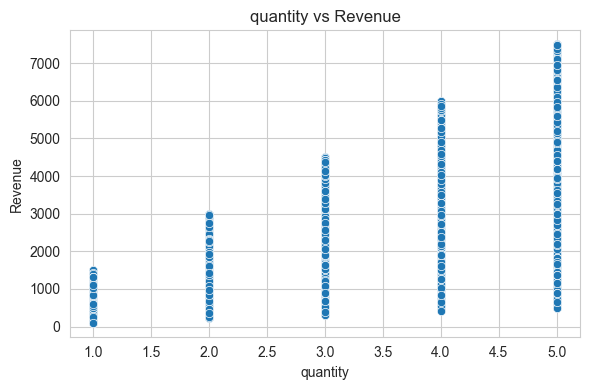

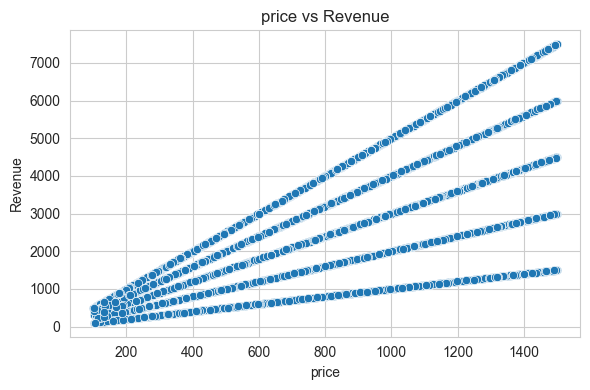

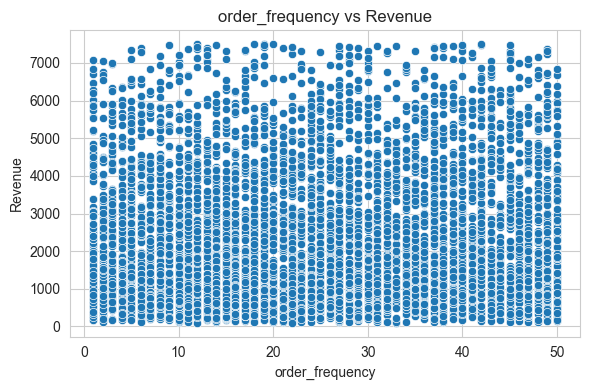

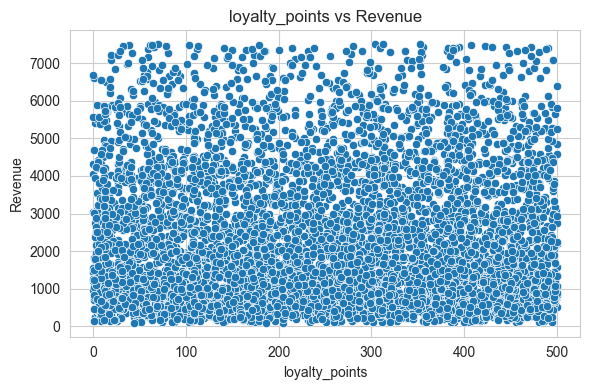

In [128]:
# Define features and target
feature = encoded_df[['quantity', 'price',
       'order_frequency', 'loyalty_points',]]

target = encoded_df["revenue"]

# Loop through each feature and plot against revenue
for col in feature.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=encoded_df[col], y=target)
    plt.title(f"{col} vs Revenue")
    plt.xlabel(col)
    plt.ylabel("Revenue")
    plt.tight_layout()
    plt.show()

<Axes: >

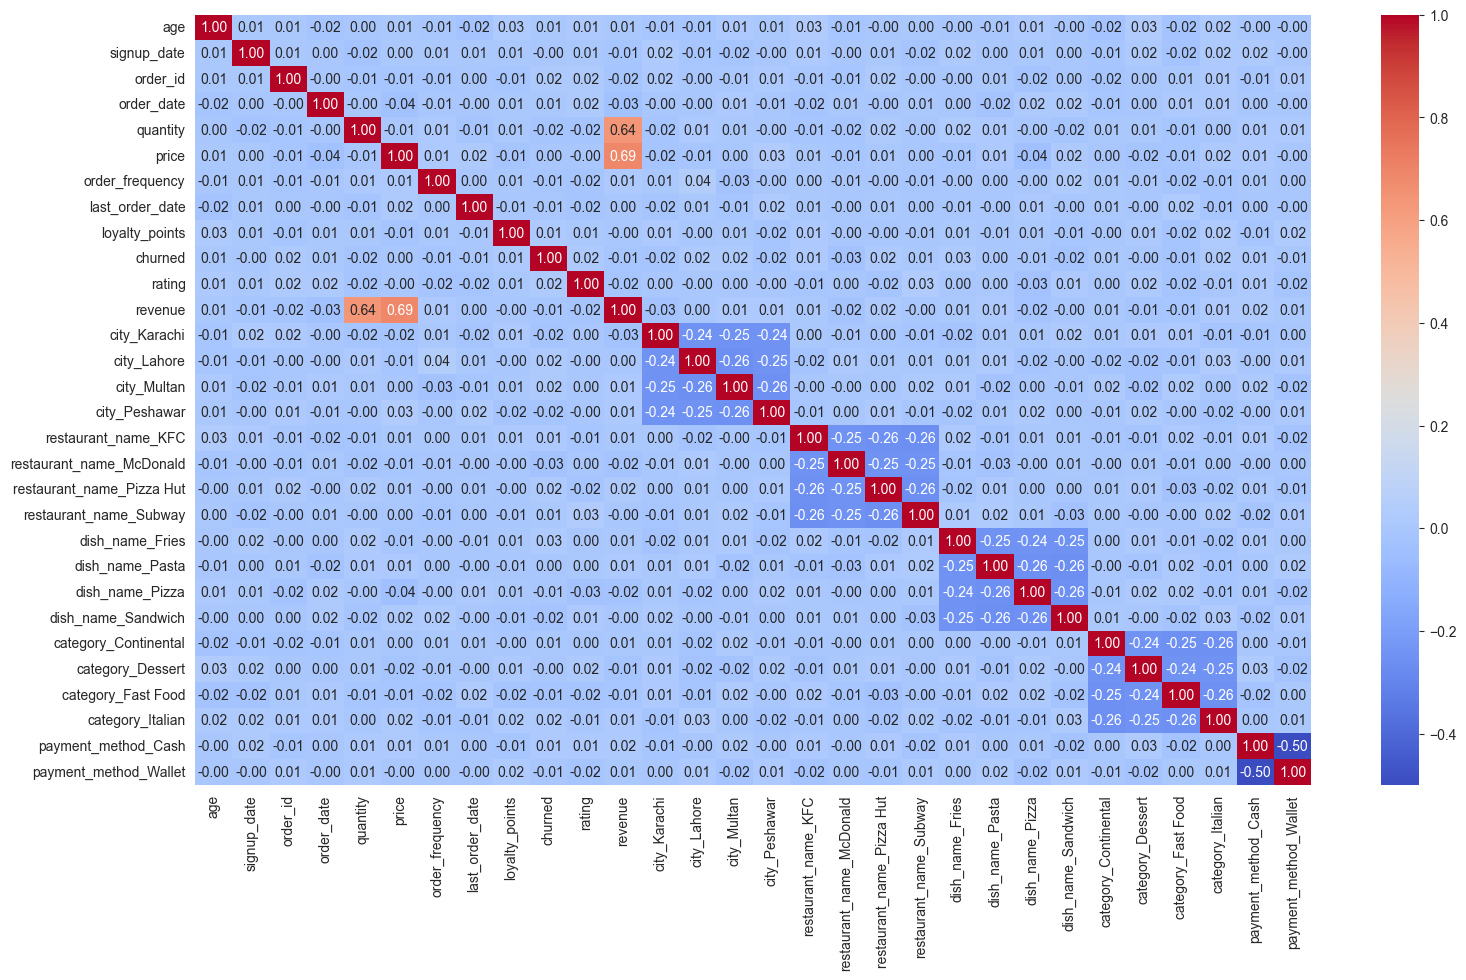

In [129]:
cor=encoded_df.corr()
plt.figure(figsize=(18,10))
sns.heatmap(data=cor, annot=True, fmt=".2f", cmap="coolwarm")

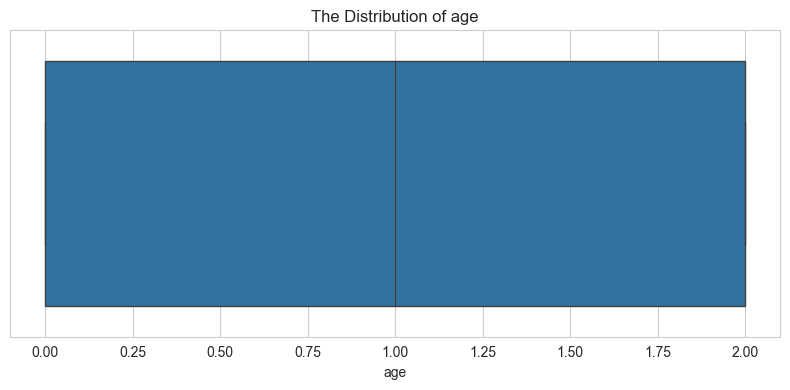

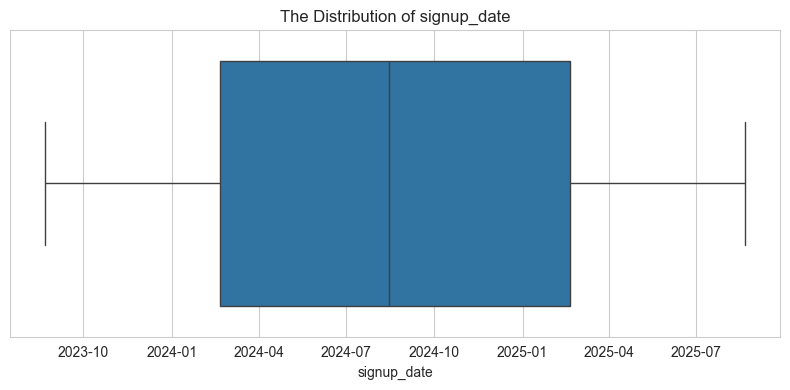

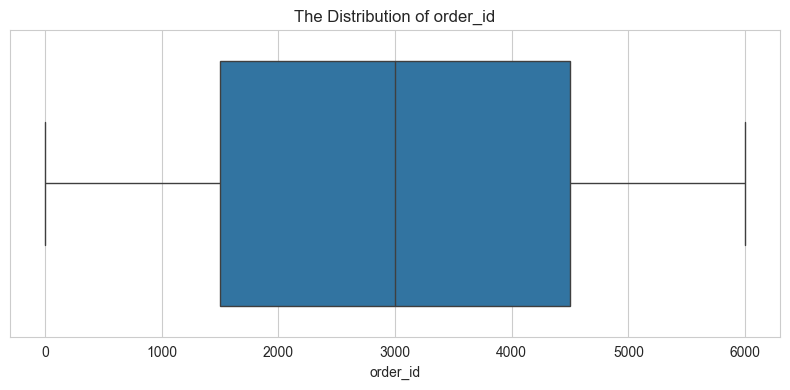

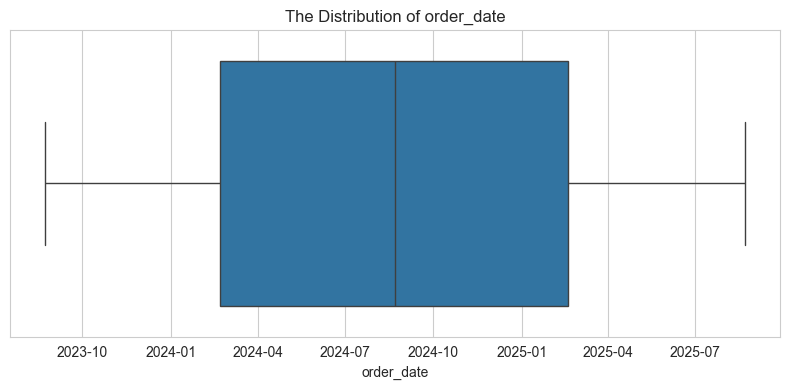

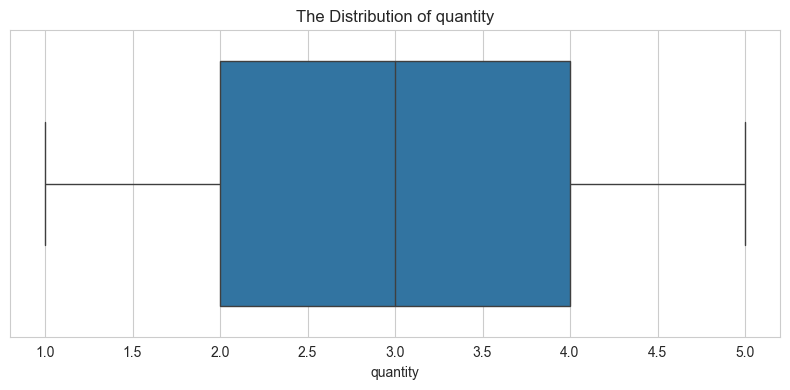

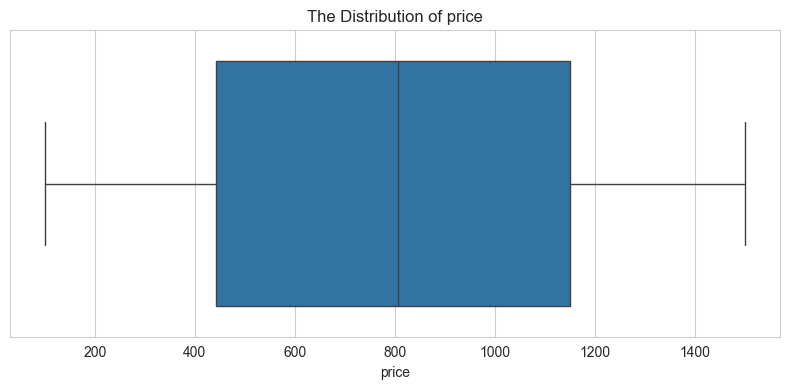

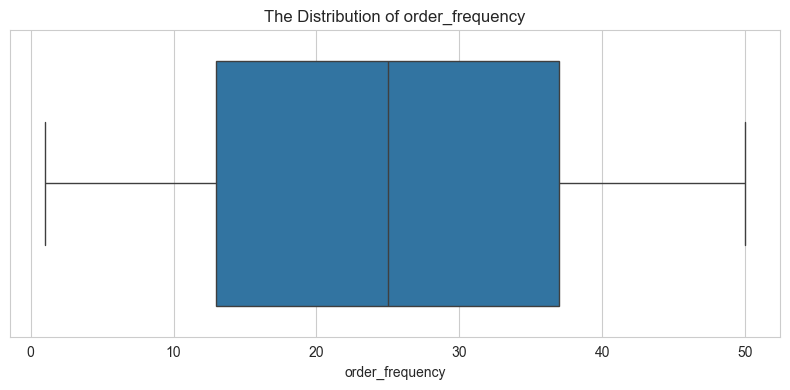

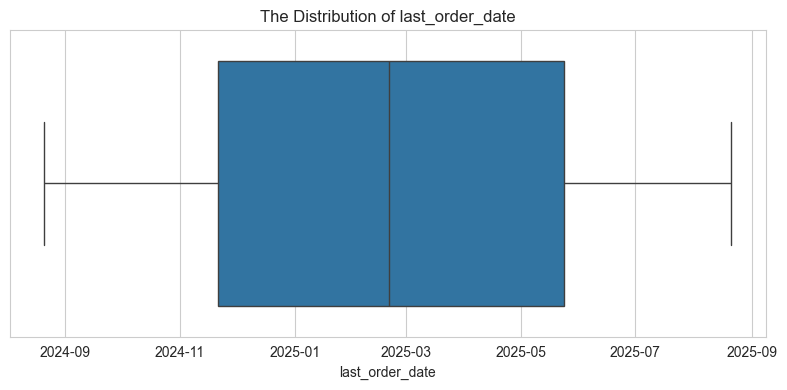

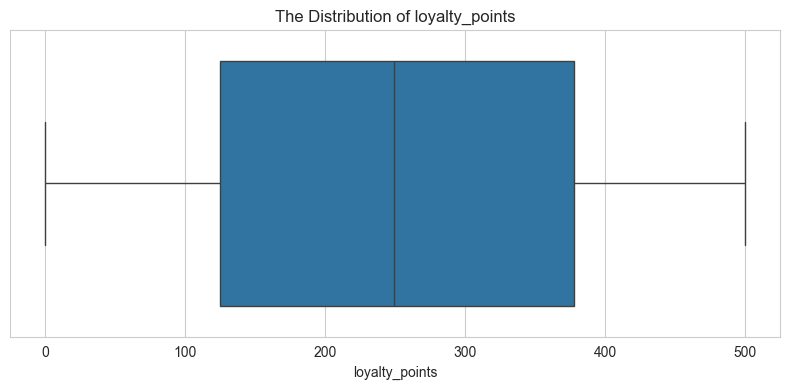

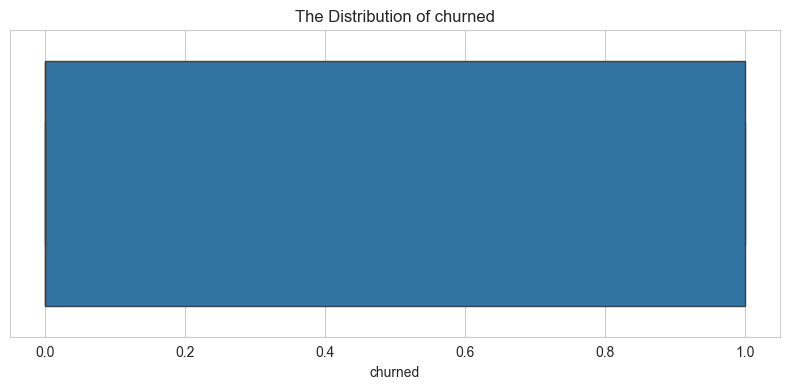

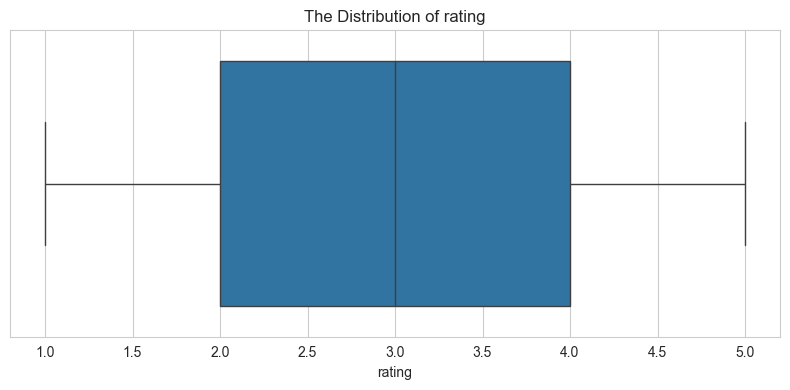

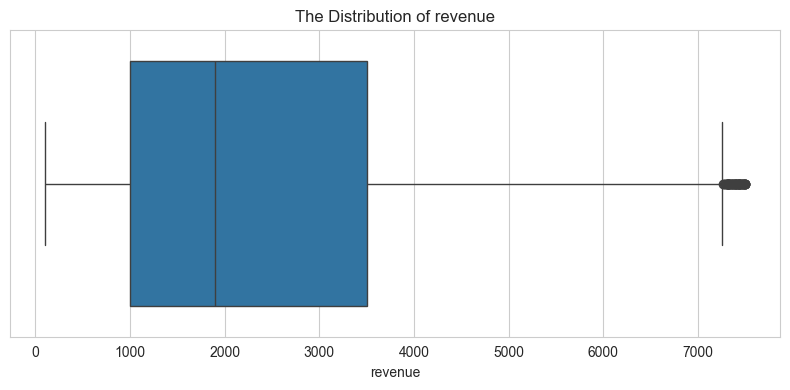

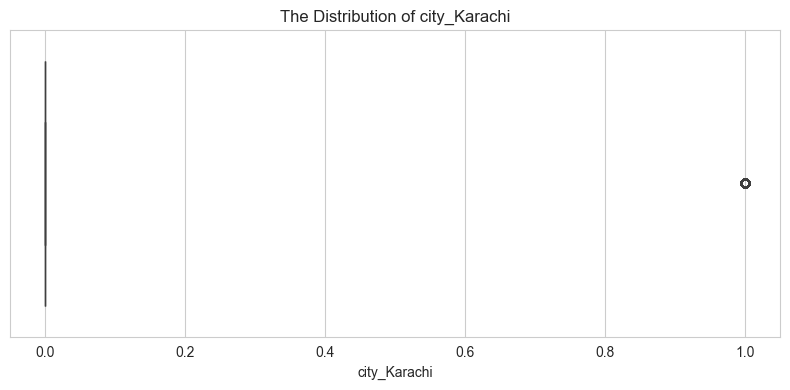

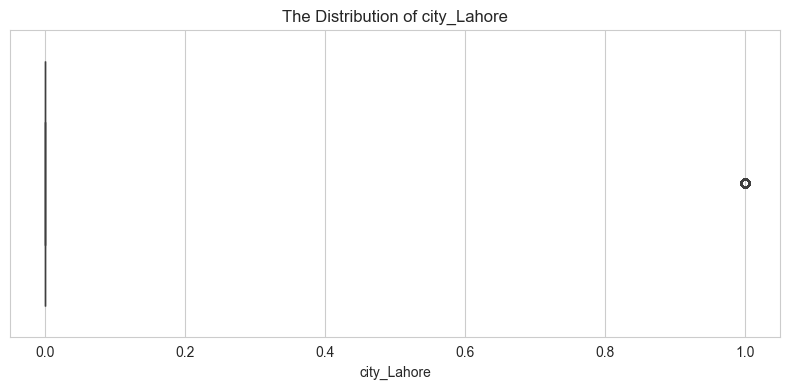

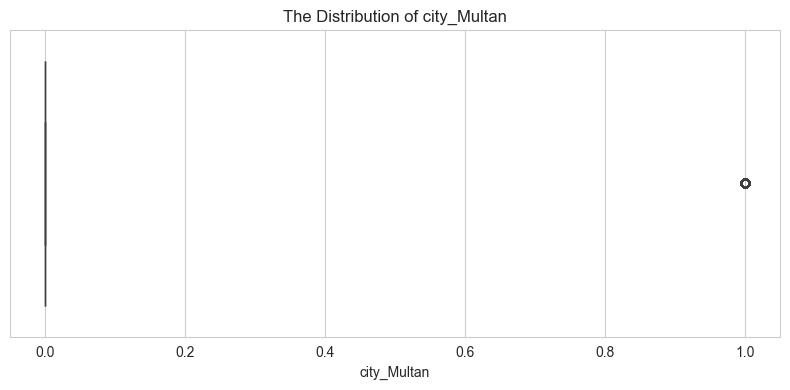

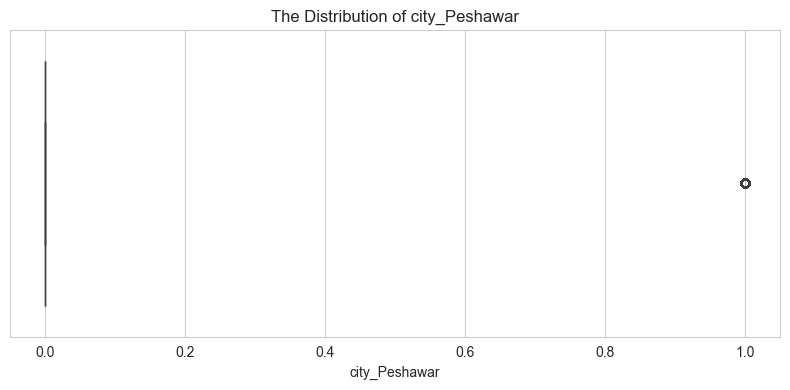

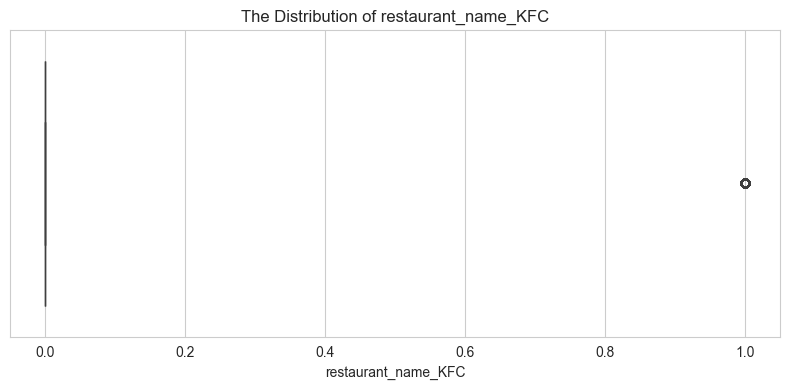

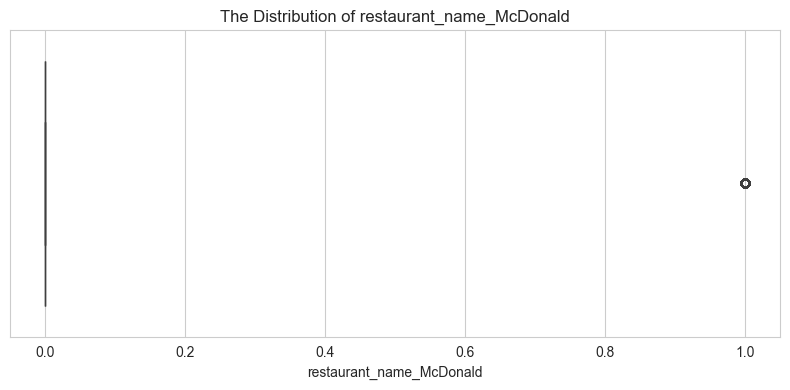

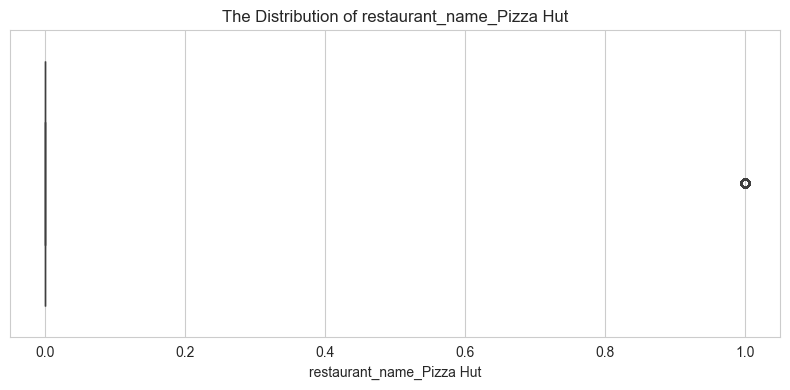

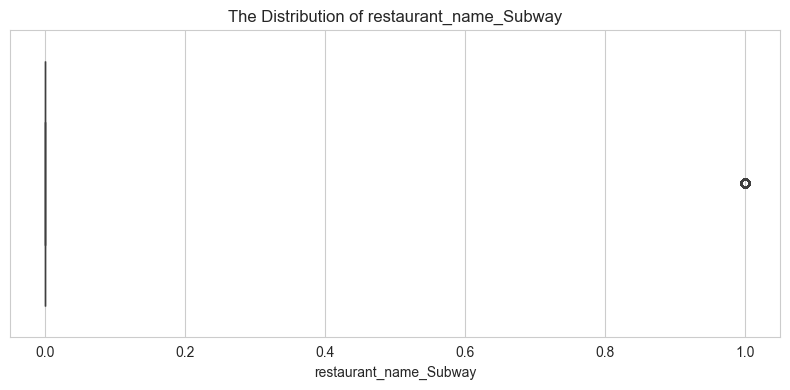

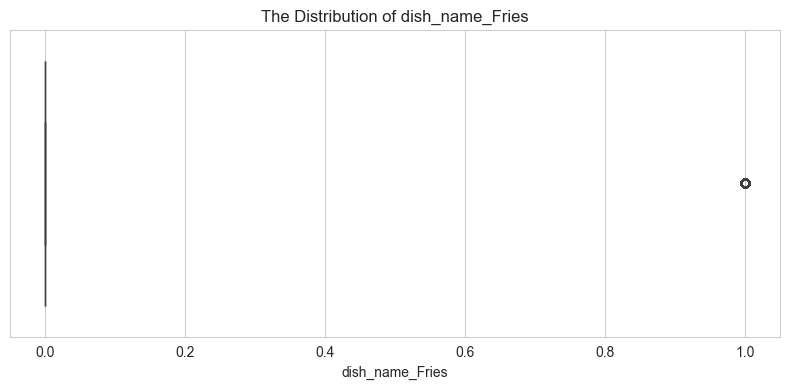

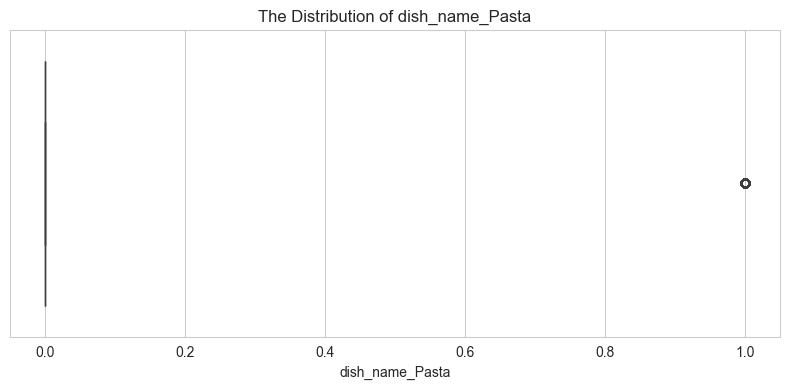

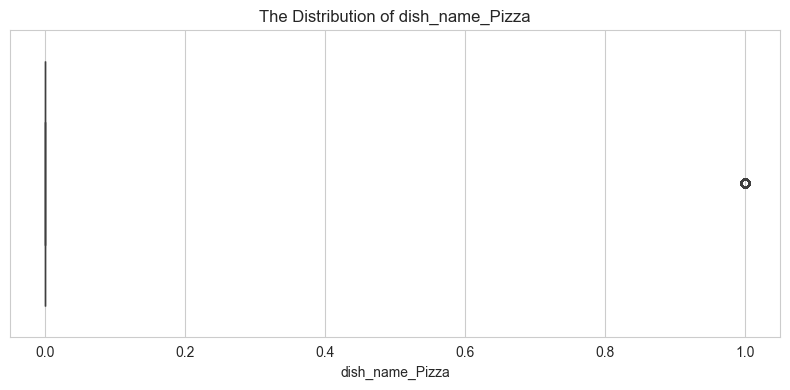

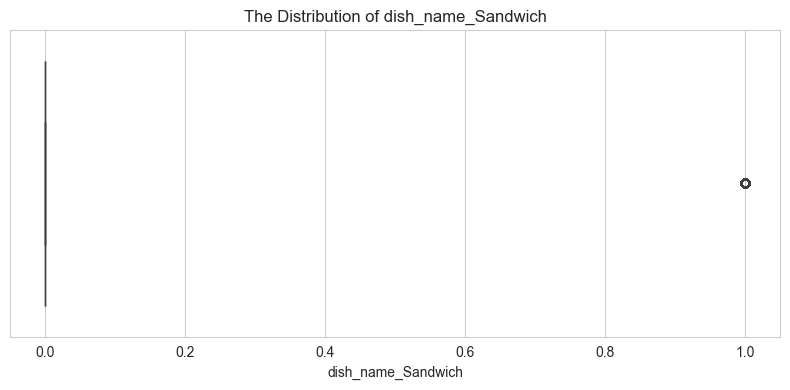

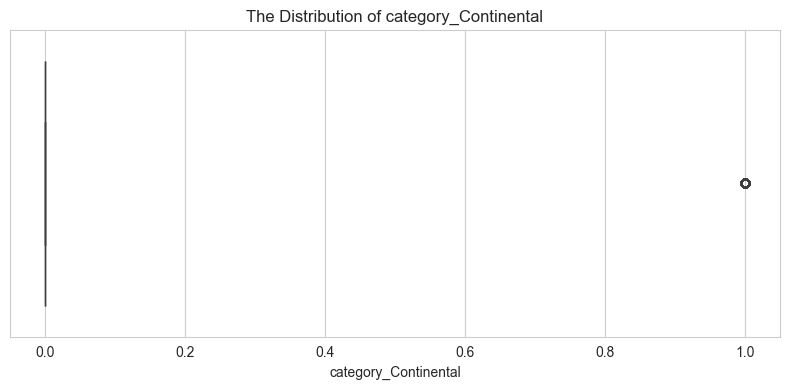

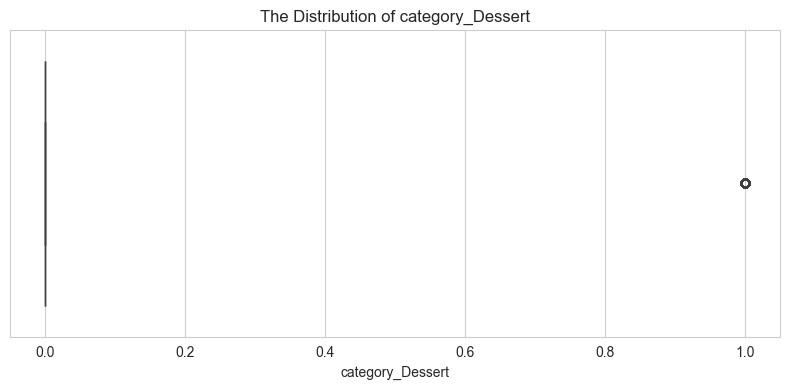

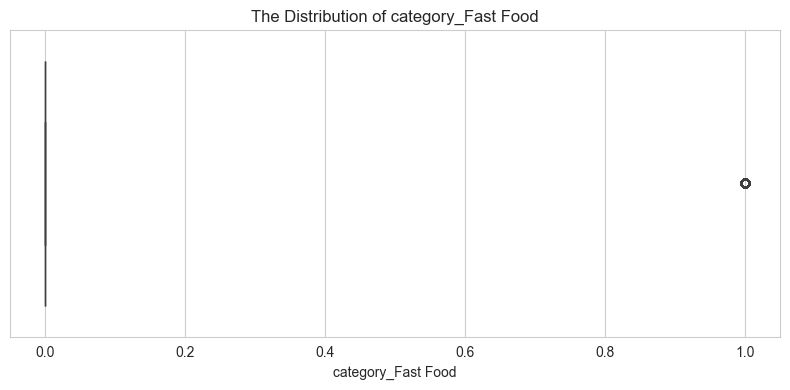

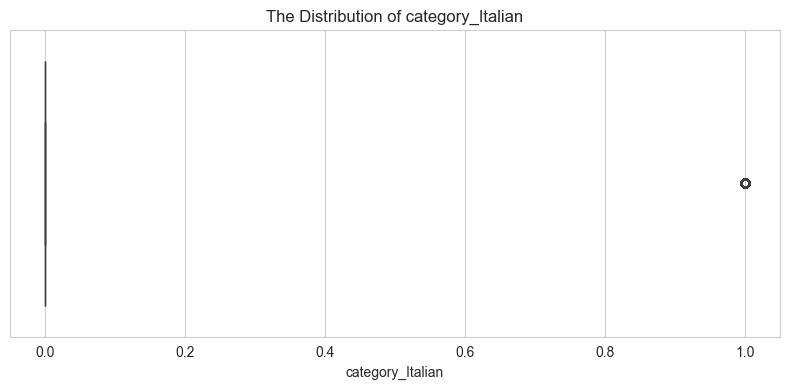

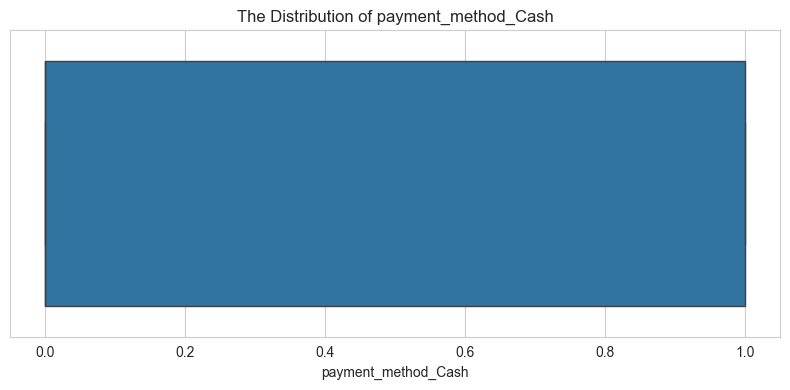

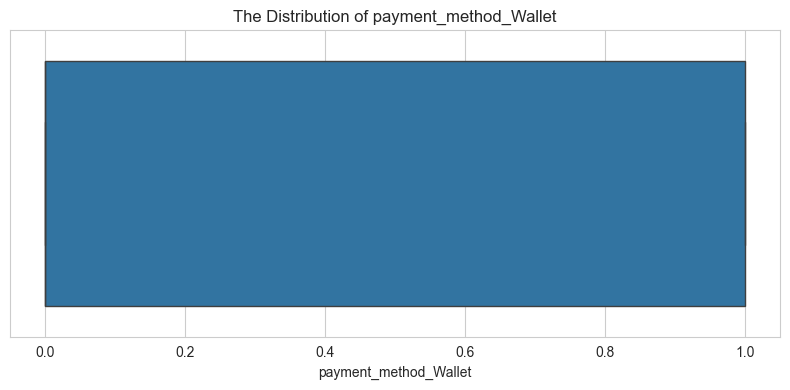

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in encoded_df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=encoded_df, x=col)
    plt.title(f"The Distribution of {col}")
    plt.tight_layout()
    plt.show()


In [131]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   age                        6000 non-null   int64         
 1   signup_date                6000 non-null   datetime64[ns]
 2   order_id                   6000 non-null   int64         
 3   order_date                 6000 non-null   datetime64[ns]
 4   quantity                   6000 non-null   int64         
 5   price                      6000 non-null   float64       
 6   order_frequency            6000 non-null   int64         
 7   last_order_date            6000 non-null   datetime64[ns]
 8   loyalty_points             6000 non-null   int64         
 9   churned                    6000 non-null   int64         
 10  rating                     6000 non-null   int64         
 11  revenue                    6000 non-null   float64       
 12  city_K

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,accuracy_score,classification_report,mean_absolute_error,mean_squared_error

In [133]:
X=feature
y=target

In [134]:
lr=LinearRegression()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
std=StandardScaler()
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [141]:
encoded_df["revenue"].describe()

count    6000.000000
mean     2390.652013
std      1754.874758
min       101.730000
25%       994.937500
50%      1901.575000
75%      3500.265000
max      7496.850000
Name: revenue, dtype: float64

In [136]:
y_pred=lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Eroor: {mae:.2f}")

Mean Squared Error: 322475.70
R² Score: 0.89
Mean Absolute Eroor: 412.48


# Cluster Model 

In [ ]:
from sklearn.cluster